In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
test=pd.read_csv('Titanic_test.csv')
train=pd.read_csv('Titanic_train.csv')

In [2]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Q1：觀察測試(test) 資料集和訓練(Train) 資料集的變數的差異性？
print('將test資料集放入train資料集訓練出的模型，以預測test資料及所缺少的survived參數值')

將test資料集放入train資料集訓練出的模型，以預測test資料及所缺少的survived參數值


In [5]:
#Q2：測試資料集是否有遺失值？
a=train.isnull().sum()
print(a)
print('Age,Cabin,Embarked有遺失值')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Age,Cabin,Embarked有遺失值


In [6]:
b=test.isnull().sum()
print(b)
print('Age,Cabin有遺失值')


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Age,Cabin有遺失值


In [7]:
#Q3：從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。 
train_test = pd.concat([test, train], axis = 0, join = 'outer')
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


C:\Users\e3105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'fillna with mode')

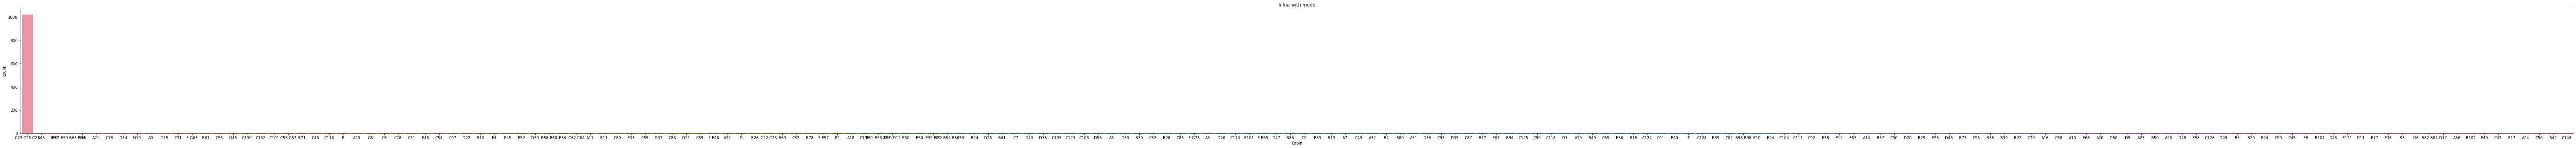

In [8]:
# Fill all NaN with "mode"
fig1=plt.figure(figsize=(120,6))
train_test_2= train_test.copy()
train_test_2['Cabin'] = train_test_2['Cabin'].fillna(train_test_2['Cabin'].mode()[0])
sns.countplot(train_test_2["Cabin"])
plt.title("fillna with mode")
#print("too many nan cause uneven distribution" )

C:\Users\e3105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Dropna')

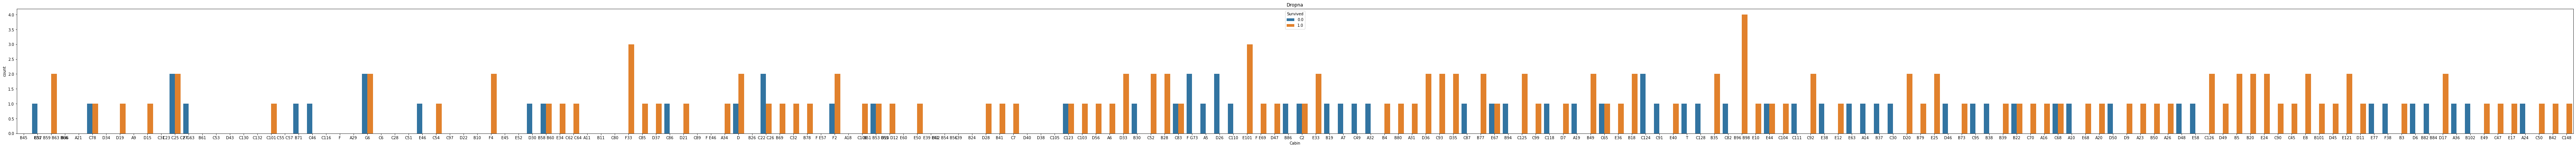

In [9]:
fig = plt.figure(figsize=(120,6))
# Remove all NaN from Cabin
train_test_3=train_test.dropna(subset=['Cabin'])
# The relationship between survival and Cabin
sns.countplot(train_test_3['Cabin'], hue = train_test_3['Survived'])
plt.title("Dropna")

有登記的Cabin資料的人員存活率和實際存活率資料相比差異甚大--有登記的Cabin資料人員存活率明顯大於實際存活率。可能可以推測當初Cabin資料蒐集與保存方式與存活下來的人員有關


C:\Users\e3105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


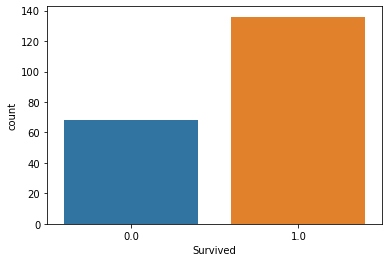

In [10]:
sns.countplot( train_test_3['Survived'])
print('有登記的Cabin資料的人員存活率和實際存活率資料相比差異甚大--有登記的Cabin資料人員存活率明顯大於實際存活率。可能可以推測當初Cabin資料蒐集與保存方式與存活下來的人員有關')

In [11]:
print("Since the data can't tell the relation for bfill or pad functin, the best way is to drop the missing Cabin data." )

Since the data can't tell the relation for bfill or pad functin, the best way is to drop the missing Cabin data.


In [12]:
# Remove all NaN from Cabin
train_test_4= train_test.copy()
# Remove all NaN from Age
train_test_4=train_test.dropna(subset=['Age'])
bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69','70-79','80+']
train_test_4['Agerange'] = pd.cut(train_test_4.Age, bins, labels = labels,include_lowest = True)
train_test_4


<ipython-input-12-119f3c5cb575>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_4['Agerange'] = pd.cut(train_test_4.Age, bins, labels = labels,include_lowest = True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Agerange
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,30-39
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,40-49
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,60-69
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,18-29
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0.0,30-39
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0,18-29
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,18-29
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,18-29


C:\Users\e3105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of the Survived and their age distribution')

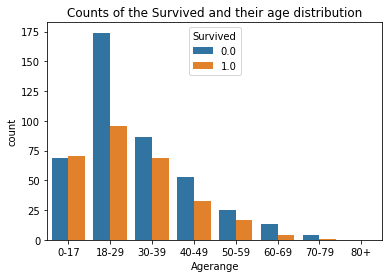

In [53]:
sns.countplot(train_test_4["Agerange"], hue=train_test_4["Survived"])
plt.title("Counts of the Survived and their age distribution")

可知女性在各年齡層分布、各艙等分布的生存率都比男性高; 男性在較好的艙等且年紀在18歲以前的存活率是男性群體中最高; 18-29歲的死亡人數比例最多，但其中死亡率集中在男性，即使是三等艙的女性也有比頭等艙的男性高的存活率


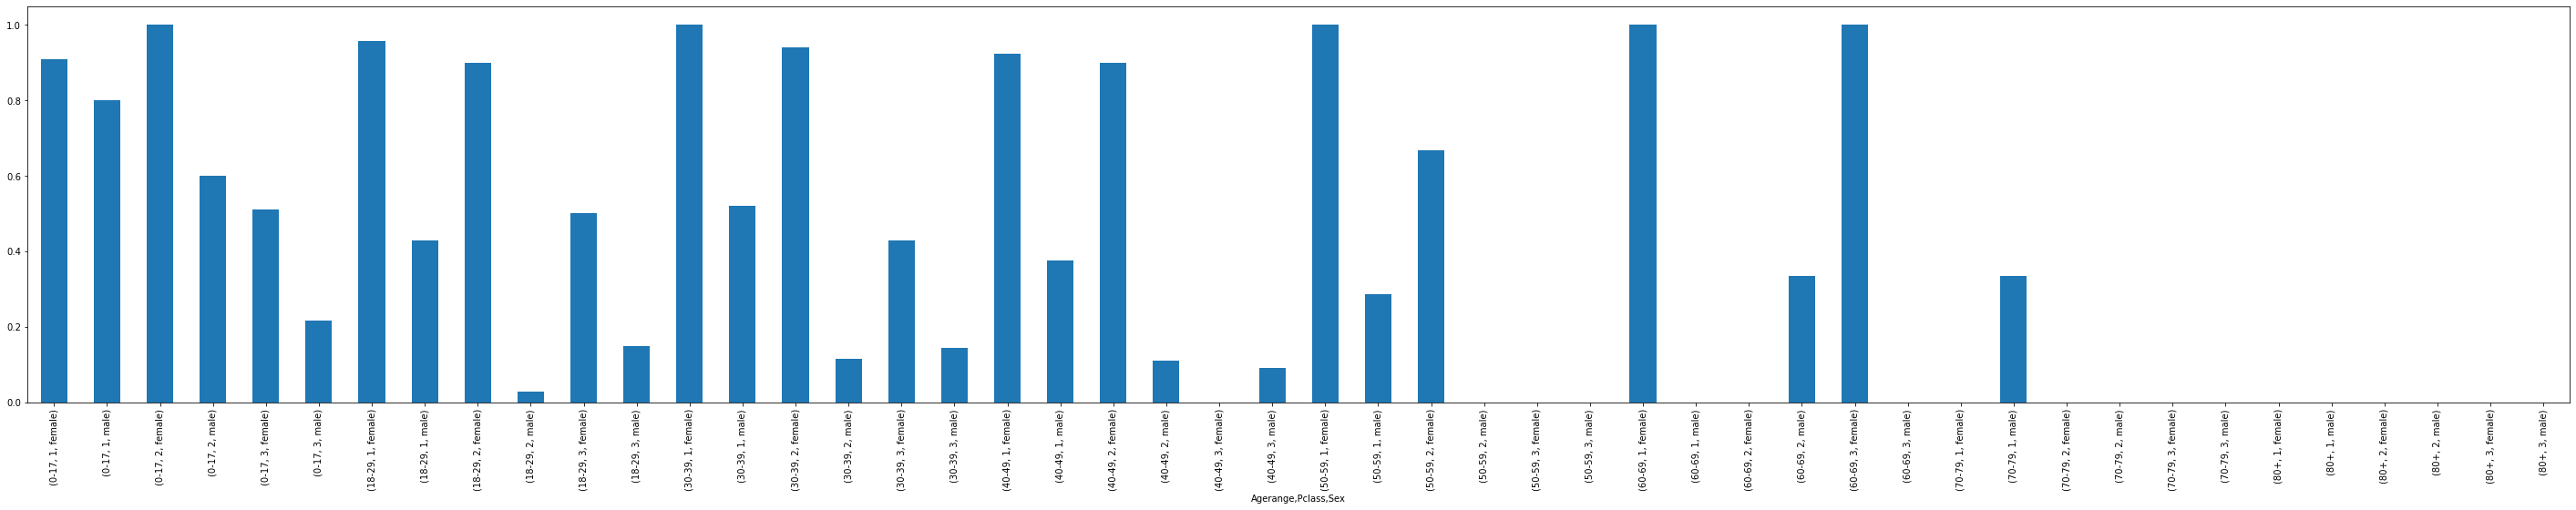

In [67]:
#觀察各年齡區間下，不同艙等下，不同性別的存活率
train_test_4_2=train_test_4.groupby(['Agerange','Pclass', 'Sex'])['Survived'].mean()
fig = plt.figure(figsize=(50,8))
train_test_4_2.plot.bar()
print('可知女性在各年齡層分布、各艙等分布的生存率都比男性高; 男性在較好的艙等且年紀在18歲以前的存活率是男性群體中最高; 18-29歲的死亡人數比例最多，但其中死亡率集中在男性，即使是三等艙的女性也有比頭等艙的男性高的存活率')